In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dl import queryClient as qc
from dl.helpers.utils import convert
from astropy import table
import time

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.time import Time
from astropy.utils.data import download_file
from astropy.io import ascii

from astroquery.vizier import Vizier

In [4]:
#Task 1:

In [5]:
#1.:

#dE=I*dA*dt*dv*d_omega
#with radiation incoming at angle theta:
#dE=I_nu*cos theta*dA*d_omega*dv*dt

#v=nu


def dE_v(I_nu, theta, dA, d_omega, dv, dt):
    """ Amount of energy entering solid angle in frequency range dv in time interval dt through surface area element
    dA, if radiation is coming at angle theta wrt to the area
    
    Parameters:
    I_nu - specific intensity
    theta - angle of incoming radiation
    dA - surface area element
    d_omega - solid angle
    dv - frequency interval
    dt - time (step?)
   
    """
    return I_nu*np.cos(theta)*dA*d_omega*dv*dt



In [6]:
#2.:

#intensity flux relation:
#assuming isotropic intensity:
#F= pi*I

def F(I):
    """Intensity flux relation
    
    Parameters:
    I - intensity
    
    returns flux given intensity
    """
    return np.pi*I


#flux=luminosity * 1/4*pi*d**2

def F(L,d):
    """ Luminosity-flux-distance relation
    
    Parameters:
    L - luminosity of source
    d - distance from source
    
    Returns flux 
    """
    return L*(1/(4*np.pi*(d**2)))

In [7]:
#3.:
#Loading catalogues:
RR1_g = pd.read_csv("RR1_ccdnum24_g.csv")
RR1_r = pd.read_csv("RR1_ccdnum24_r.csv")
RR1_r

,Unnamed: 0,Unnamed: 0.1,RA_deg,DEC_deg,coord_ra,coord_dec,object,Field,ccdnum,MJDObs,Obs,AIRMASS,SEEING,EXPTIME,base_PsfFlux_flux,base_PsfFlux_fluxSigma
0,2824324,2824324,308.320016,-39.743841,5.381199,-0.693661,3,1,24,57992.020866,1.0,1.16,3.541,180.0,6456.231126,2.061478e+02
1,2824325,2824325,308.319982,-39.743845,5.381199,-0.693661,3,1,24,57992.060952,2.0,1.06,2.691,180.0,7037.745935,2.168252e+05
2,2824326,2824326,308.319995,-39.743841,5.381199,-0.693661,3,1,24,57992.156018,3.0,1.03,2.343,180.0,7412.639419,2.212691e+06
3,2824327,2824327,308.319996,-39.743839,5.381199,-0.693661,3,1,24,57992.200498,4.0,1.11,1.739,180.0,7572.270812,9.913424e+01
4,2824328,2824328,308.319978,-39.743845,5.381199,-0.693661,3,1,24,57992.239972,5.0,1.24,2.692,180.0,7462.238420,1.241357e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126692,2951016,2951016,308.611204,-39.741859,5.386282,-0.693626,13700,1,24,57997.050752,28.0,1.06,2.088,180.0,12475.842852,3.921903e+02
126693,2951017,2951017,308.611195,-39.741837,5.386281,-0.693626,13700,1,24,57997.090503,29.0,1.02,2.365,180.0,17052.328207,2.899958e+02
126694,2951018,2951018,308.611185,-39.741837,5.386281,-0.693626,13700,1,24,57997.132091,30.0,1.02,2.388,180.0,12964.828405,3.437217e+02
126695,2951019,2951019,308.611196,-39.741849,5.386281,-0.693626,13700,1,24,57997.172540,31.0,1.08,2.060,180.0,13757.813659,2.995325e+02


In [8]:
#limiting data based on min MJDObs:

np.min(RR1_r.loc[:,"MJDObs"])
np.min(RR1_g.loc[:,"MJDObs"])
#min r: 57992.02086554
#min g: 57992.10106363

57992.10106363

In [9]:
#Using Boolean to limit data:
RR1_g=(RR1_g.loc[RR1_g['MJDObs']==57992.10106363])
RR1_r=(RR1_r.loc[RR1_r['MJDObs']==57992.02086554])

In [10]:
#checking values
RR1_g.loc[:,["RA_deg", 'DEC_deg']]
RR1_r.loc[:,["RA_deg", 'DEC_deg']]



,RA_deg,DEC_deg
0,308.320016,-39.743841
21,308.320250,-39.718540
43,308.320965,-39.682494
63,308.322075,-39.759207
92,308.322392,-39.783704
...,...,...
44359,308.690959,-39.745337
44391,308.689269,-39.744014
44421,308.697928,-39.766443
44452,308.699691,-39.764427


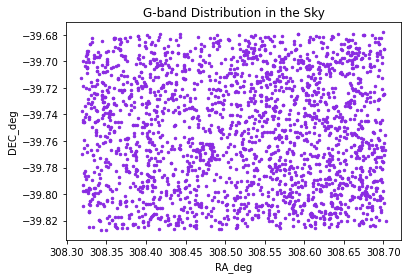

In [11]:
#plotting distributions in sky:
#this was easier to see in two seperate plots rather than subplots
#but I made them into subplots in latex
RR1_g.plot.scatter(x="RA_deg", y="DEC_deg", s=6, color='blueviolet')
plt.title("G-band Distribution in the Sky")

plt.savefig("g_band_distb.pdf", format="pdf")
#~

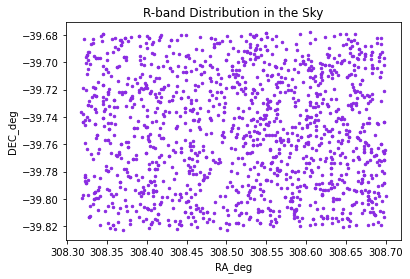

In [12]:
RR1_r.plot.scatter(x="RA_deg", y="DEC_deg", s=6, color='blueviolet')
plt.title("R-band Distribution in the Sky")

plt.savefig("r_band_distb.pdf", format="pdf")
#~

In [13]:
#4:
#writing instrumental magnitude function:
#psf= point spread fxn

def mag(F,t_exp,a,k,X):
    """ Calculates the instrumental magnitudes
    
    Parameters:
    F: PSF-based fluxes
    t_exp: exposure time values
    a: photometric-zero point
    k: first-order extinction coefficient
    X: AIRMASS

    """
    return -2.5*np.log10(F/t_exp)-a-k*X

In [14]:
#calculating g and r magnitudes:
a_g=-25.34
a_r=-25.45

k_g=0.2
k_r=0.1

mag_g = mag(RR1_g["base_PsfFlux_flux"], RR1_g["EXPTIME"], a_g, k_g, RR1_g["AIRMASS"])

mag_r = mag(RR1_r["base_PsfFlux_flux"], RR1_r["EXPTIME"], a_r, k_r, RR1_r["AIRMASS"])

print(mag_g)

0       23.861655
2       24.363026
4       21.058610
6       23.079918
8       21.998937
          ...    
6552    23.146350
6555    22.809736
6558    17.340246
6561    22.924525
6564    20.881389
Length: 2428, dtype: float64


In [15]:
#5:
#describing magnitude distribution for each band
#doing this by finding the mean and standard deviation of g and r band magnitudes
#and plotting histograms of the magnitudes:

#finding mean and std dev of g and r band magnitudes: 


mean_g=np.mean(mag_g)
mean_r=np.mean(mag_r)

std_g=np.std(mag_g)
std_r=np.std(mag_r)

print("Mean of g band magnitudes =", mean_g)
print("Standard deviation of g band magnitudes =", std_g)
print("Mean of r band magnitudes =", mean_r)
print("Standard deviation of r band magnitudes =", std_r)

Mean of g band magnitudes = 22.194945424763127
Standard deviation of g band magnitudes = 2.068800989737598
Mean of r band magnitudes = 20.382471914389406
Standard deviation of r band magnitudes = 1.978183838129411


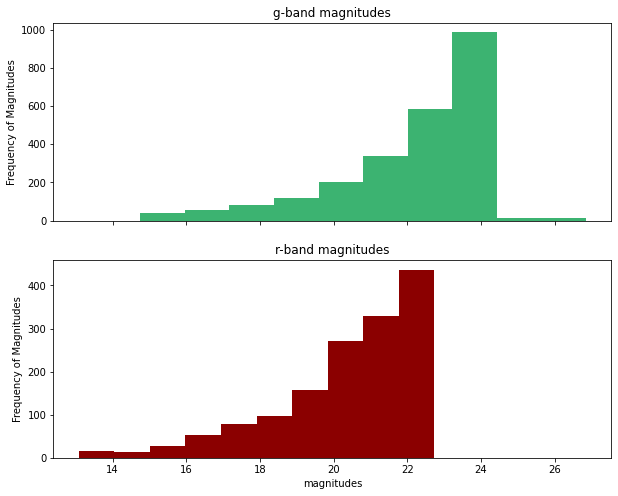

In [16]:
#histograms of magnitudes:
f,ax = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[0].hist(mag_g, color='mediumseagreen')
ax[1].hist(mag_r, color='darkred')
ax[0].set_title('g-band magnitudes', )
ax[1].set_title('r-band magnitudes', )
ax[1].set_xlabel("magnitudes")
ax[0].set_ylabel("Frequency of Magnitudes")
ax[1].set_ylabel("Frequency of Magnitudes")
plt.savefig("mags_hist.pdf", format="pdf")
#~

In [17]:
#Task 2: 
#1:
#finding minimum and maximum ra and dec values for g:

#FIND OVERALL MINIMUM AND MAX FOR R AND G WHICHEVER HAS LOWEST 

min_r=np.min(RR1_r.loc[:,"RA_deg"])
min_d=np.min(RR1_r.loc[:,"DEC_deg"])
max_r=np.max(RR1_g.loc[:,"RA_deg"])
max_d=np.max(RR1_g.loc[:,"DEC_deg"])
print("min RA=",min_r)
print("min DEC=", min_d)
print("max RA=",max_r)
print("max DEC=", max_d)
#using whichever min and max values are greatest overall
#g band ra and dec max are biggest
#r band ra and dec min are smallest

min RA= 308.31782021463647
min DEC= -39.82282976211589
max RA= 308.7028601477132
max DEC= -39.67807337315705


In [18]:
#retrieving data:
q= 'SELECT * FROM nsc_dr2.object WHERE ra > 308.31782021463647 AND ra < 308.7028601477132 AND dec > -39.82282976211589 AND dec < -39.67807337315705'
result = qc.query(sql=q)
noir_data = table.Table.from_pandas((convert(result,'pandas')))


In [19]:
#2:
noir_data 
#nsc pre calibrated

ra,dec,mjd,glon,glat,elon,elat,pix,raerr,decerr,pmra,pmdec,pmraerr,pmdecerr,deltamjd,umag,urms,uerr,uasemi,ubsemi,utheta,gmag,grms,gerr,gasemi,gbsemi,gtheta,rmag,rrms,rerr,rasemi,rbsemi,rtheta,imag,irms,ierr,iasemi,ibsemi,itheta,zmag,zrms,zerr,zasemi,zbsemi,ztheta,ymag,yrms,yerr,yasemi,ybsemi,ytheta,vrmag,vrrms,vrerr,vrasemi,vrbsemi,vrtheta,asemi,asemierr,bsemi,bsemierr,theta,thetaerr,fwhm,class_star,ebv,rmsvar,madvar,iqrvar,etavar,jvar,kvar,chivar,romsvar,nsigvar,htm9,ring256,nest4096,random_id,ndet,nphot,ndetu,nphotu,ndetg,nphotg,ndetr,nphotr,ndeti,nphoti,ndetz,nphotz,ndety,nphoty,ndetvr,nphotvr,flags,variable10sig,parent,id
float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str12
308.32096280190314,-39.682466597682925,57881.36930144522,1.936994683694596,-35.84644172004842,300.56721103233986,-20.22269108915535,160950,0.01102,0.011178,22.496914,11.599014,26.60974,26.70617,818.932,99.99,--,9.99,--,--,--,21.769016,0.141637,0.032886,0.656982,0.572754,73.515625,20.916145,0.189807,0.007089,0.817571,0.74138,45.561897,20.744728,0.229907,0.049508,0.631348,0.542725,53.28125,20.625,--,0.125366,0.570801,0.356934,147.625,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,0.774989,0.005973,0.692706,0.005106,52.533546,8.594681,2.680693,0.144694,0.047418,0.188737,0.069497,0.069496,0.714932,1.680632,0.464221,0.902951,2.483193,0.283744,3143754,644461,194479164,83.2254,34,34,0,0,4,4,26,26,3,3,1,1,0,0,0,0,3,0,0,160950_5468
308.3275699290373,-39.6869924249514,57899.74792151007,1.9322842576066008,-35.85207722810836,300.57117131638586,-20.22839437009149,160950,0.026615,0.026692,-67.95943,-23.507433,43.17458,43.26009,812.96826,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,23.35109,0.161373,0.038218,0.343628,0.302226,108.85547,21.960274,0.076677,0.081837,0.422119,0.357056,89.04297,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,0.354841,0.014501,0.310059,0.011977,106.02511,15.633814,1.325928,0.631696,0.047244,0.152187,0.138994,0.156259,0.493264,-0.066607,0.884076,0.288875,1.029079,-0.115031,3143756,644461,194479158,47.6987,14,14,0,0,0,0,12,12,2,2,0,0,0,0,0,0,0,0,0,160950_7567
308.3297698487498,-39.68688033411824,57915.18903717003,1.9326957993799183,-35.85374075959527,300.5729434735408,-20.228731305923,160950,0.030725,0.030902,55.84443,-24.647034,48.023052,48.180275,812.96826,99.99,--,9.99,--,--,--,22.892675,0.282354,0.095128,0.567383,0.326538,90.65625,22.691835,0.253959,0.028835,0.51123,0.335959,100.11673,22.546875,--,0.160522,0.214111,0.131104,90.5,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,0.50199,0.015881,0.324774,0.010298,98.68984,6.912286,2.329126,0.336508,0.047211,0.257096,0.254822,0.231653,0.63515,0.876807,0.803977,0.444949,1.645932,1.813133,3143756,644461,194479158,20.88749,20,20,0,0,2,2,17,17,1,1,0,0,0,0,0,0,0,0,0,160950_7566
308.3321378596892,-39.68252644191863,57908.61455805808,1.9383164683787677,-35.8549752016502,300.5760372083393,-20.22500971547081,160950,0.011029,0.011207,-21.977318,10.777421,22.566462,22.753363,818.9715,99.99,--,9.99,--,--,--,23.704134,0.155128,0.08366,0.32196,0.238281,91.958496,22.135397,0.160999,0.014111,0.480068,0.440678,104.67159,21.066788,0.017526,0.042228,0.554118,0.455078,82.171875,20.5625,--,0.095398,0.572266,0.451416,124.75,99.99,--,9.99,--,--,--,99.99,--,9.99,--,--,--,0.471232,0.007652,0.41968

In [20]:
#g mag and r mag are available, which we can compare with our g mag and r mag calculated from  HOWVAST data
#ra and dec are available and would be useful for comparing with HOWVAST's catalog

#there are also mjd values which we can compare with 
#mjd = modified julian date
#so we can compare if data was measured at the same time


# I don't think we can compare flux or AIRMASS, as noir doesn't have those
noir_data.columns

<TableColumns names=('ra','dec','mjd','glon','glat','elon','elat','pix','raerr','decerr','pmra','pmdec','pmraerr','pmdecerr','deltamjd','umag','urms','uerr','uasemi','ubsemi','utheta','gmag','grms','gerr','gasemi','gbsemi','gtheta','rmag','rrms','rerr','rasemi','rbsemi','rtheta','imag','irms','ierr','iasemi','ibsemi','itheta','zmag','zrms','zerr','zasemi','zbsemi','ztheta','ymag','yrms','yerr','yasemi','ybsemi','ytheta','vrmag','vrrms','vrerr','vrasemi','vrbsemi','vrtheta','asemi','asemierr','bsemi','bsemierr','theta','thetaerr','fwhm','class_star','ebv','rmsvar','madvar','iqrvar','etavar','jvar','kvar','chivar','romsvar','nsigvar','htm9','ring256','nest4096','random_id','ndet','nphot','ndetu','nphotu','ndetg','nphotg','ndetr','nphotr','ndeti','nphoti','ndetz','nphotz','ndety','nphoty','ndetvr','nphotvr','flags','variable10sig','parent','id')>

In [21]:
#limiting out the 99.99 gmag values:
noir_data=noir_data[(noir_data["gmag"] != 99.99)]
print(len(noir_data))

noir_data=noir_data[(noir_data["rmag"] != 99.99)]
print(len(noir_data))

#making sure the data is limited to stars and not galaxies
noir_data=noir_data[(noir_data["class_star"]>0.85)]




# noir_data

2166
2019


In [22]:
#calculating instrumental magnitudes
#I put these here to make adding the magnitudes to the columns 
#and matching the HOWVAST data with the restricted magnitudes to the NOIR data easier
#or else I would have had to match them twice if I'd made these later on
mag_g = mag(RR1_g["base_PsfFlux_flux"], RR1_g["EXPTIME"], a_g, k_g, RR1_g["AIRMASS"])
RR1_g.insert(16, "mag_g", mag_g, True)


mag_r = mag(RR1_r["base_PsfFlux_flux"], RR1_r["EXPTIME"], a_r, k_r, RR1_r["AIRMASS"])
RR1_r.insert(16, "mag_r", mag_r, True)

RR1_g=(RR1_g.loc[RR1_g['mag_g']<23])
RR1_r=(RR1_r.loc[RR1_r['mag_r']<23])

RR1_r

,Unnamed: 0,Unnamed: 0.1,RA_deg,DEC_deg,coord_ra,coord_dec,object,Field,ccdnum,MJDObs,Obs,AIRMASS,SEEING,EXPTIME,base_PsfFlux_flux,base_PsfFlux_fluxSigma,mag_r
0,2824324,2824324,308.320016,-39.743841,5.381199,-0.693661,3,1,24,57992.020866,1.0,1.16,3.541,180.0,6456.231126,2.061478e+02,21.447234
21,2824345,2824345,308.320250,-39.718540,5.381204,-0.693219,4,1,24,57992.020866,1.0,1.16,3.541,180.0,10773.008261,2.095361e+02,20.891339
43,2824367,2824367,308.320965,-39.682494,5.381216,-0.692590,5,1,24,57992.020866,1.0,1.16,3.541,180.0,7593.425386,2.077441e+02,21.271087
63,2824387,2824387,308.322075,-39.759207,5.381235,-0.693929,6,1,24,57992.020866,1.0,1.16,3.541,180.0,10619.301086,2.085473e+02,20.906941
92,2824416,2824416,308.322392,-39.783704,5.381241,-0.694357,7,1,24,57992.020866,1.0,1.16,3.541,180.0,5527.674013,2.067371e+02,21.615825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44359,2868683,2868683,308.690959,-39.745337,5.387674,-0.693687,1651,1,24,57992.020866,1.0,1.16,3.541,180.0,44926.985770,2.396895e+02,19.340913
44391,2868715,2868715,308.689269,-39.744014,5.387644,-0.693664,1652,1,24,57992.020866,1.0,1.16,3.541,180.0,3708.724058,2.071588e+02,22.049120
44421,2868745,2868745,308.697928,-39.766443,5.387795,-0.694055,1653,1,24,57992.020866,1.0,1.16,3.541,180.0,11200.846211,2.121396e+02,20.849054
44452,2868776,2868776,308.699691,-39.764427,5.387826,-0.694020,1654,1,24,57992.020866,1.0,1.16,3.541,180.0,3826.225354,1.943669e+06,22.015255


In [23]:
#propogating HOWVAST uncertainties:
#I put these here for the same reasons as for the magnitudes
#get these uncertainties from flux uncertainties
#log of flux
#equation is -2.5*np.log(F/t_exp)-a-k*X
#uncertainty of f=n*x is u(f)= n*u(x)
#uncertainty of log x = u(x)/x
#implies u_mag= n* (u(x)/x) where n is -2.5

def u_mag(uflux, flux):
    return np.abs((-2.5*uflux)/(np.log(10)*flux))

#ln 10
#wikipedia uncertainties page


u_mag_r=u_mag(RR1_r["base_PsfFlux_fluxSigma"], RR1_r["base_PsfFlux_flux"],)

RR1_r.insert(17, "u_mag_r", u_mag_r, True)

u_mag_g=u_mag(RR1_g["base_PsfFlux_fluxSigma"], RR1_g["base_PsfFlux_flux"], )
RR1_g.insert(17, "u_mag_g", u_mag_g, True)
RR1_g

#limiting out large uncertainties:
RR1_g=(RR1_g.loc[RR1_g['u_mag_g']<0.1])
RR1_r=(RR1_r.loc[RR1_r['u_mag_r']<0.1])
RR1_r

,Unnamed: 0,Unnamed: 0.1,RA_deg,DEC_deg,coord_ra,coord_dec,object,Field,ccdnum,MJDObs,Obs,AIRMASS,SEEING,EXPTIME,base_PsfFlux_flux,base_PsfFlux_fluxSigma,mag_r,u_mag_r
0,2824324,2824324,308.320016,-39.743841,5.381199,-0.693661,3,1,24,57992.020866,1.0,1.16,3.541,180.0,6456.231126,206.147822,21.447234,0.034668
21,2824345,2824345,308.320250,-39.718540,5.381204,-0.693219,4,1,24,57992.020866,1.0,1.16,3.541,180.0,10773.008261,209.536074,20.891339,0.021118
43,2824367,2824367,308.320965,-39.682494,5.381216,-0.692590,5,1,24,57992.020866,1.0,1.16,3.541,180.0,7593.425386,207.744141,21.271087,0.029704
63,2824387,2824387,308.322075,-39.759207,5.381235,-0.693929,6,1,24,57992.020866,1.0,1.16,3.541,180.0,10619.301086,208.547291,20.906941,0.021322
92,2824416,2824416,308.322392,-39.783704,5.381241,-0.694357,7,1,24,57992.020866,1.0,1.16,3.541,180.0,5527.674013,206.737097,21.615825,0.040607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44327,2868651,2868651,308.698447,-39.743864,5.387804,-0.693661,1649,1,24,57992.020866,1.0,1.16,3.541,180.0,547573.119996,486.573269,16.626076,0.000965
44359,2868683,2868683,308.690959,-39.745337,5.387674,-0.693687,1651,1,24,57992.020866,1.0,1.16,3.541,180.0,44926.985770,239.689541,19.340913,0.005793
44391,2868715,2868715,308.689269,-39.744014,5.387644,-0.693664,1652,1,24,57992.020866,1.0,1.16,3.541,180.0,3708.724058,207.158835,22.049120,0.060646
44421,2868745,2868745,308.697928,-39.766443,5.387795,-0.694055,1653,1,24,57992.020866,1.0,1.16,3.541,180.0,11200.846211,212.139569,20.849054,0.020563


In [24]:
#crossmatch based on equatorial coords:
c1 = SkyCoord(ra=RR1_g['RA_deg'].to_numpy()*u.degree, dec=RR1_g['DEC_deg'].to_numpy()*u.degree)
catalog1 = SkyCoord(ra=RR1_r['RA_deg'].to_numpy()*u.degree, dec=RR1_r['DEC_deg'].to_numpy()*u.degree)
match1, d2d1, d3d1 = c1.match_to_catalog_sky(catalog1)



In [25]:
#updating limited HOWVAST data,
#bulky because wouldn't work without converting back and forth between numpy arrays
RR1_g=RR1_g.to_numpy()[d2d1<0.5*u.arcsec]
RR1_g=pd.DataFrame(RR1_g, columns=['Unnamed: 0', 'Unnamed: 0.1', 'RA_deg', 'DEC_deg', 'coord_ra',
       'coord_dec', 'object', 'Field', 'ccdnum', 'MJDObs', 'Obs', 'AIRMASS',
       'SEEING', 'EXPTIME', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma', 'mag_g', 'u_mag_g'])
print(np.shape(RR1_g))

(1067, 18)


In [26]:
RR1_r=RR1_r.to_numpy()[match1][d2d1<0.5*u.arcsec]
RR1_r=pd.DataFrame(RR1_r, columns=['Unnamed: 0', 'Unnamed: 0.1', 'RA_deg', 'DEC_deg', 'coord_ra',
       'coord_dec', 'object', 'Field', 'ccdnum', 'MJDObs', 'Obs', 'AIRMASS',
       'SEEING', 'EXPTIME', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma', 'mag_r', 'u_mag_r'])

In [27]:
print(np.shape(RR1_r))
#good - now have the same shape

(1067, 18)


In [28]:
type(noir_data)

astropy.table.table.Table

In [29]:
c = SkyCoord(ra=noir_data['ra']*u.degree, dec=noir_data['dec']*u.degree)
catalog = SkyCoord(ra=RR1_r['RA_deg'].to_numpy()*u.degree, dec=RR1_r['DEC_deg'].to_numpy()*u.degree)
match, d2d, d3d = c.match_to_catalog_sky(catalog)

#I crossmatched the data by first crossmatching the g and r band HOWVAST data
#so that they would be the same shape
#I did this using astropy SkyCoords
#I defined the crossmatch by matching equatorial coordinates (ra and dec values)
#I defined the best crossmatched pairs by whether the distance between the stars was less than 0.5 arcsec

#there are 516 matches

In [30]:
#updating again
RR1_g=RR1_g.to_numpy()[match][d2d<0.5*u.arcsec]
RR1_g=pd.DataFrame(RR1_g, columns=['Unnamed: 0', 'Unnamed: 0.1', 'RA_deg', 'DEC_deg', 'coord_ra',
       'coord_dec', 'object', 'Field', 'ccdnum', 'MJDObs', 'Obs', 'AIRMASS',
       'SEEING', 'EXPTIME', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma', 'mag_g', 'u_mag_g'])
print(np.shape(RR1_g))

(516, 18)


In [31]:
RR1_r=RR1_r.to_numpy()[match][d2d<0.5*u.arcsec]
RR1_r=pd.DataFrame(RR1_r, columns=['Unnamed: 0', 'Unnamed: 0.1', 'RA_deg', 'DEC_deg', 'coord_ra',
       'coord_dec', 'object', 'Field', 'ccdnum', 'MJDObs', 'Obs', 'AIRMASS',
       'SEEING', 'EXPTIME', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma', 'mag_r', 'u_mag_r', ])

In [32]:
noir_data=noir_data[d2d<0.5*u.arcsec]
print(np.shape(noir_data))

(516,)


In [33]:
#merging tables
noir_data=noir_data.to_pandas()
t1=table.Table.from_pandas(noir_data)
t2=table.Table.from_pandas(RR1_r)
t2

Unnamed: 0,Unnamed: 0.1,RA_deg,DEC_deg,coord_ra,coord_dec,object,Field,ccdnum,MJDObs,Obs,AIRMASS,SEEING,EXPTIME,base_PsfFlux_flux,base_PsfFlux_fluxSigma,mag_r,u_mag_r
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2824976.0,2824976.0,308.3323238401988,-39.68554526180142,5.381414241336877,-0.6926434302676698,29.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,6607.534327776174,205.67575169967992,21.422082692565944,0.033796208840331944
2824324.0,2824324.0,308.32001608576167,-39.74384056542559,5.381199430498421,-0.6936608752543614,3.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,6456.231125502281,206.1478215011063,21.447233589694743,0.034667617838473004
2846478.0,2846478.0,308.3219156711253,-39.74567891613083,5.381232584517439,-0.6936929605269742,821.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,6291.712711638002,205.627527962606,21.475259052975034,0.03548433662442172
2846414.0,2846414.0,308.3197595478313,-39.73771249522027,5.38119495306688,-0.6935539202524852,814.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,11912.369016545024,212.2625233095116,20.78218591688039,0.019346370663162547
2846685.0,2846685.0,308.32464752773564,-39.73974360095482,5.38128026440998,-0.6935893697350091,828.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,12239.571171863105,211.0305317163809,20.752765757645363,0.01871989511532506
2846653.0,2846653.0,308.3277688768264,-39.7419723864803,5.381334742228719,-0.6936282693807496,827.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,1077244.3360411408,650.4615748610842,15.891395714449835,0.0006555891342404775
2846564.0,2846564.0,308.3236692617301,-39.78845080272856,5.381263190447225,-0.6944394707753941,824.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,9086.058215149593,207.7749431249915,21.076242475135036,0.02482801373826003
2824598.0,2824598.0,308.3263747971646,-39.79731313603296,5.381310410948586,-0.6945941476709652,14.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,24417.242423072108,221.3984331637124,20.00293972512703,0.00984469459726655
2847101.0,2847101.0,308.33600356647145,-39.79950429207855,5.381478464675905,-0.6946323905583855,844.0,1.0,24.0,57992.02086554,1.0,1.16,3.5410000000000004,180.0,8893.821526093741,207.13437599542752,21.099460237419855,0.025286463260860415


In [34]:
#making merged table for writeup:

print(np.shape(t1))
print(np.shape(t2))
t3=table.hstack((t1, t2))
t3=t3['ra', 'dec', 'rmag', 'RA_deg', 'DEC_deg', 'mag_r'][1:11]
t3


(516,)
(516,)


ra,dec,rmag,RA_deg,DEC_deg,mag_r
float64,float64,float64,float64,float64,float64
308.3199815157328,-39.74382571463147,21.343632,308.32001608576167,-39.74384056542559,21.447233589694743
308.32191564303275,-39.74569709506943,21.355093,308.3219156711253,-39.74567891613083,21.475259052975034
308.31976394843497,-39.73769648446402,20.624195,308.3197595478313,-39.73771249522027,20.78218591688039
308.32463524933576,-39.7397136514464,20.663216,308.32464752773564,-39.73974360095482,20.752765757645363
308.3277821120881,-39.74191975250112,15.746295,308.3277688768264,-39.7419723864803,15.891395714449835
308.323668519267,-39.78843478930611,20.98415,308.3236692617301,-39.78845080272856,21.076242475135036
308.3263659268317,-39.79730484727615,19.916483,308.3263747971646,-39.79731313603296,20.00293972512703
308.3359846562108,-39.79946088055532,21.039448,308.33600356647145,-39.79950429207855,21.099460237419855
308.33397811953824,-39.78349216603588,19.414886,308.3339833259193,-39.78350806393074,19.55387001689415


In [35]:
#code for putting this table in latex
ascii.write(t3, Writer=ascii.Latex, col_align='|lr|',
            latexdict={'preamble': r'\begin{center}',
                       'tablefoot': r'\end{center}',
                       'tabletype': 'table*'}) 

\begin{table*}
\begin{center}
\begin{tabular}{|lr|}
ra & dec & rmag & RA_deg & DEC_deg & mag_r \\
308.3199815157328 & -39.74382571463147 & 21.343632 & 308.32001608576167 & -39.74384056542559 & 21.447233589694743 \\
308.32191564303275 & -39.74569709506943 & 21.355093 & 308.3219156711253 & -39.74567891613083 & 21.475259052975034 \\
308.31976394843497 & -39.73769648446402 & 20.624195 & 308.3197595478313 & -39.73771249522027 & 20.78218591688039 \\
308.32463524933576 & -39.7397136514464 & 20.663216 & 308.32464752773564 & -39.73974360095482 & 20.752765757645363 \\
308.3277821120881 & -39.74191975250112 & 15.746295 & 308.3277688768264 & -39.7419723864803 & 15.891395714449835 \\
308.323668519267 & -39.78843478930611 & 20.98415 & 308.3236692617301 & -39.78845080272856 & 21.076242475135036 \\
308.3263659268317 & -39.79730484727615 & 19.916483 & 308.3263747971646 & -39.79731313603296 & 20.00293972512703 \\
308.3359846562108 & -39.79946088055532 & 21.039448 & 308.33600356647145 & -39.7995042920785

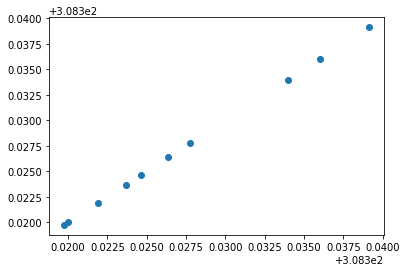

In [36]:
#double checking that it worked properly
plt.scatter(t3['ra'], t3['RA_deg'])
#X

In [37]:
#Task 3:
#putting this on a seperate line so that this doesn't change every time I run the graph cell below
noir_g_r= noir_data['gmag'] - noir_data['rmag']

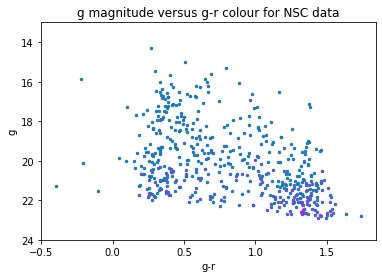

In [61]:
#CMD for NSC data:


plt.scatter(noir_g_r, noir_data["gmag"], s=6)
plt.errorbar(noir_g_r, noir_data["gmag"], yerr=noir_data["gerr"], color= "magenta", ls="none")

plt.ylim(24, 13)

plt.xlabel("g-r")
plt.ylabel("g")
plt.title("g magnitude versus g-r colour for NSC data")
plt.savefig("nsc_cmd_gr_g.pdf", format="pdf")
#~

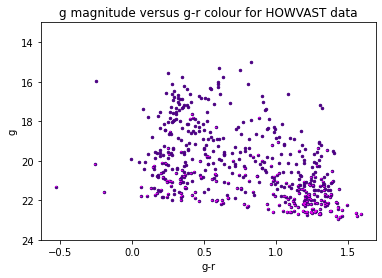

In [39]:
#CMD for HOWVAST data:
#g vs g-r colour


plt.scatter(RR1_g['mag_g']-RR1_r['mag_r'],RR1_g['mag_g'], s=6, color='indigo')
plt.errorbar(RR1_g['mag_g']-RR1_r['mag_r'],RR1_g['mag_g'], yerr=RR1_g['u_mag_g'], color= "magenta", ls="none")

plt.ylim(24, 13)
plt.title("g magnitude versus g-r colour for HOWVAST data")
plt.xlabel("g-r")
plt.ylabel("g")
plt.savefig("hvst_cmd_gr_g.pdf", format="pdf")

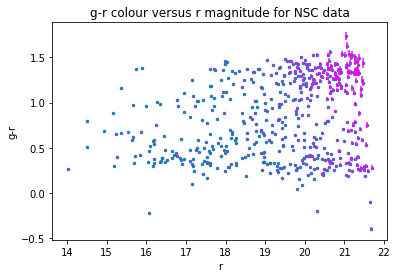

In [40]:
#nsc g-r error:

n_g_r_err=np.sqrt((noir_data["rerr"])**2+(noir_data["gerr"])**2)

#NSC g-r vs r colour:
plt.scatter(noir_data['rmag'], noir_g_r, s=6)
plt.errorbar(noir_data['rmag'], noir_g_r, yerr=n_g_r_err, color= "magenta", ls="none")


plt.xlabel("r")
plt.ylabel("g-r")
plt.title("g-r colour versus r magnitude for NSC data")
plt.savefig("nsc_cmd_gr_r.pdf", format="pdf")

#~

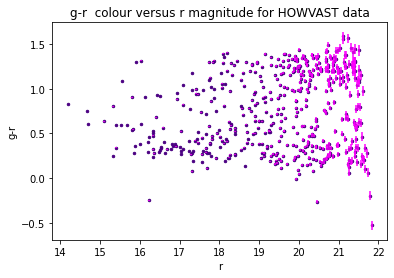

In [41]:
#HOWVAST g-r vs r:

u_mag_g_r=np.sqrt(RR1_r['u_mag_r']**2 + RR1_g['u_mag_g']**2)


plt.scatter(RR1_r['mag_r'],RR1_g['mag_g']-RR1_r['mag_r'], s=6, color='indigo')
plt.errorbar(RR1_r['mag_r'],RR1_g['mag_g']-RR1_r['mag_r'], yerr=u_mag_g_r, color= "magenta", ls="none")


plt.title("g-r  colour versus r magnitude for HOWVAST data")
plt.ylabel("g-r")
plt.xlabel("r")
plt.savefig("hvst_cmd_gr_r.pdf", format="pdf")

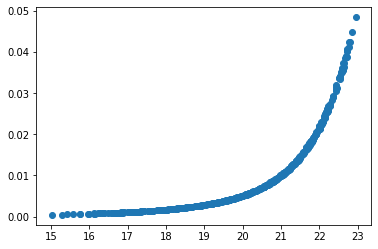

In [42]:
#checking which errors and magnitudes to limit out
plt.scatter(RR1_g['mag_g'], RR1_g['u_mag_g'])
# plt.ylim(-0.2,0.5)
#get rid of stuff with errors > 0.5
#horizontal bit ideal
#went back and limited the magnitude to less than 22
#X

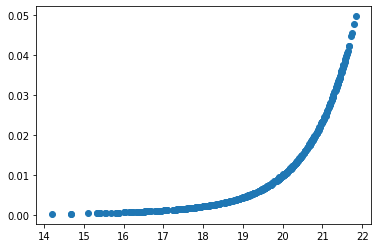

In [43]:
#same as above but for r-band
plt.scatter(RR1_r['mag_r'], RR1_r['u_mag_r'])
# plt.ylim(-0.2,0.5)
#X

Mean g band magnitude difference = -0.06260684895473373
Standard deviation of g band magnitude differences = 0.05666660965735644
Mean of r band magnitude differeces = -0.1271602625046551
Standard deviation of r band magnitude differences = 0.03777407560485827


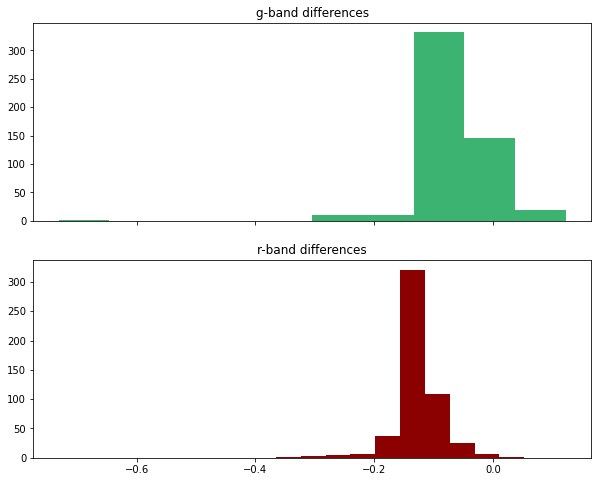

In [44]:
#2:
#comparing mags:



#magnitude differences:
def mag_diff(noir_mag, HOWVAST_mag):
    return noir_mag - HOWVAST_mag


g_band_mag_diff= mag_diff(noir_data["gmag"], RR1_g['mag_g'])
r_band_mag_diff= mag_diff(noir_data["rmag"], RR1_r['mag_r'])

mean_g_band_diff=np.mean(g_band_mag_diff)
mean_r_band_diff=np.mean(r_band_mag_diff)

std_g_band_diff=np.std(g_band_mag_diff)
std_r_band_diff=np.std(r_band_mag_diff)

print("Mean g band magnitude difference =", mean_g_band_diff)
print("Standard deviation of g band magnitude differences =", std_g_band_diff)
print("Mean of r band magnitude differeces =", mean_r_band_diff)
print("Standard deviation of r band magnitude differences =", std_r_band_diff)

#plotting histogram of difference values:
f,ax = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[0].hist(g_band_mag_diff, color='mediumseagreen')
ax[1].hist(r_band_mag_diff, color='darkred')
ax[0].set_title('g-band differences', )
ax[1].set_title('r-band differences', )

#get rid of 99.99 outliers and plot hist to 40
#masks

#call them g and r 

#significant differences of ~ 100 
# because of the nsc 99.99 magnitude values
#possibly equivalent to NAN values
# If this is the case I would set these magnitude values equal to NAN, or limit them out
#the next step would be to see if the magnitude differences fall within the range of
#the g_err and r_err given for the NSC data
#maybe limit out the large values


plt.savefig("mag_diff_hist.pdf", format="pdf")


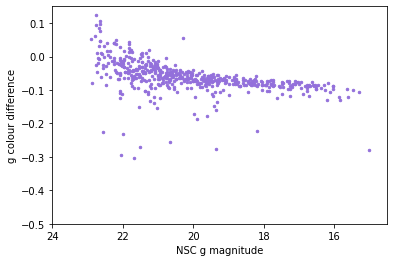

In [60]:
#NSC g-mag difference
#because g colour difference plotted here is NSC - HOWVAST, NSC has larger magnitudes
plt.scatter( noir_data["gmag"], g_band_mag_diff, s=6, color='mediumpurple')
plt.ylim(-.5,.15)
plt.xlim(24, 14.5)
plt.xlabel("NSC g magnitude")
plt.ylabel("g colour difference")
#we can see as they get fainter the difference increases
#these have bigger differences than r-band

plt.savefig("nsc_gmag_diff.pdf", format="pdf")
#~

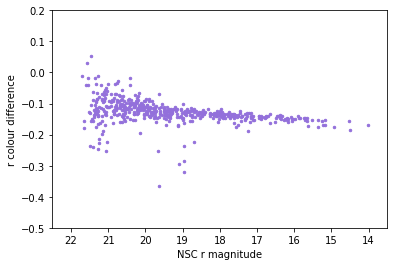

In [59]:
#NSC r-mag difference
plt.scatter(noir_data["rmag"], r_band_mag_diff, s=6, color='mediumpurple')
plt.ylim(-0.5,0.2)
plt.xlim(22.5,13.5)
plt.xlabel("NSC r magnitude")
plt.ylabel("r colour difference")
#linear relation between mag and diff
plt.savefig("nsc_rmag_diff.pdf", format="pdf")
#~

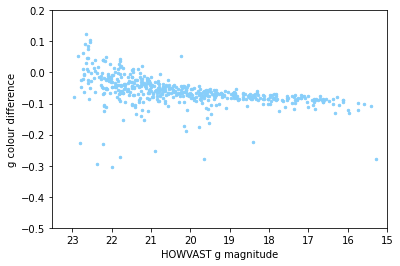

In [57]:
#HOWVAST g-mag difference
#because g colour difference plotted here is NSC - HOWVAST, NSC has larger magnitudes
plt.scatter(RR1_g["mag_g"], g_band_mag_diff, s=6, color='lightskyblue')
plt.ylim(-.5,.2)
plt.xlim(23.5, 15)
plt.xlabel("HOWVAST g magnitude")
plt.ylabel("g colour difference")
#we can see as they get fainter the difference increases
#these have bigger differences than r-band

plt.savefig("hvst_gmag_diff.pdf", format="pdf")
#~

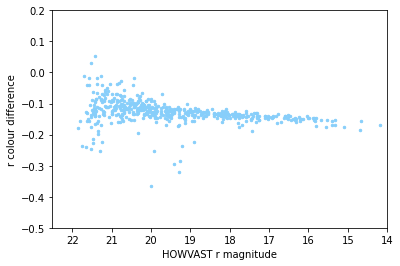

In [58]:
#HOWVAST r-mag difference
#because g colour difference plotted here is NSC - HOWVAST, NSC has larger magnitudes
plt.scatter(RR1_r["mag_r"], r_band_mag_diff, s=6, color='lightskyblue')
plt.ylim(-.5,.2)
plt.xlim(22.5, 14)
plt.xlabel("HOWVAST r magnitude")
plt.ylabel("r colour difference")
#we can see as they get fainter the difference increases
#these have bigger differences than r-band

plt.savefig("hvst_rmag_diff.pdf", format="pdf")
#~

In [49]:
#Optional task
#Gaia data
#getting Gaia data within the same ra and dec ranges as HOWVAST data:
query_string = 'SELECT * from gaia_edr3.gaia_source where ra > 308.31782021463647 AND ra < 308.7028601477132 AND dec > -39.82282976211589 AND dec < -39.67807337315705'
result = qc.query(sql=query_string)
gaia_data = table.Table.from_pandas((convert(result,'pandas')))
#q= 'SELECT * FROM nsc_dr2.object WHERE ra > 308.31782021463647 AND ra < 308.7028601477132 AND dec > -39.82282976211589 AND dec < -39.67807337315705'

In [50]:
gaia_data

solution_id,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_sigma5d_max,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,l,b,ecl_lon,ecl_lat,glon,glat,elon,elat,random_index,ref_epoch,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,htm9,ring256,nest4096,random_id,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_matched_transits,visibility_periods_used,matched_transits,new_matched_transits,matched_transits_removed,ipd_frac_multi_peak,ipd_frac_odd_win,duplicated_source,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,dr2_rv_nb_transits,designation
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str29
1636042515805110273,6682253021269028224,308.34467300975734,3.5003054,-39.67927293372259,2.0802526,--,--,--,--,--,--,--,--,-0.13160649,--,--,--,--,--,--,--,--,--,28.88978,1629.5829,22.731165,51.532658,--,--,--,--,--,--,--,--,7.7063704,0.21828276,4.2408695,--,0.54235387,0.38985923,0.32481754,0.663446,-2.2105749,-1.4566311,14.199472,21.00748,64.22104151390941,0.9942537,64.59221,21.168173,100.33883715159016,9.312546,10.774588,20.33487,289.48268977685666,9.753782,29.67902,18.59384,6.069997,1.7410297,-0.83330345,2.5743332,--,--,1.9438532536712712,-35.8641083035584,300.58687660710444,-20.224424111240264,1.9438599144915485,-35.86411136225571,300.5868682368325,-20.224407496378557,1161299846,2016,--,--,--,3143756,644461,194479159,2.092231,269,0,265,4,3,0,31,13,34,14,3,0,0,1,259,27,30,0,27,0,30,0,0,Gaia EDR3 6682253021269028224
1636042515805110273,6682252785045862528,308.3183260585489,0.55029225,-39.73454617433287,0.36118665,2.7520047916143136,0.71413434,3.8536236,25.95754,5.927500726506843,0.6546157,-25.271695794833885,0.69265866,-0.031415947,0.4483686,0.108996406,-0.337983,-0.11384641,-0.23861082,-0.0044557285,-0.04008101,-0.24203587,0.29082215,2.058371,414.89224,1.556747,1.3948327,--,1.3790371,0.123965494,-0.2241801,0.22001909,0.009034695,-0.16726868,0.017619666,1.0748732,0.024599768,9.722225,1.0795457,0.46269885,0.38682953,0.2376605

In [51]:
gaia_data.columns

<TableColumns names=('solution_id','source_id','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_sigma5d_max','ipd_gof_harmonic_amplitude','ipd_gof_harmonic_phase','ruwe','scan_direction_strength_k1','scan_direction_strength_k2','scan_direction_strength_k3','scan_direction_strength_k4','scan_direction_mean_k1','scan_direction_mean_k2','scan_direction_mean_k3','scan_direction_mean_k4','phot_g_mean_flux','phot_g_mean_flux_error','phot

In [52]:
#useful columns:
#ra and dec will be useful to compare with RA_deg and DEC_deg from HOWVAST data
#their errors ra_error and dec_error will also help us compare if we plot them
#phot_g_mean_mag to compare with g band magnitudes
#phot_g_mean_flux to compare with g band psf flux
#same with phot_rp_mean_flux and phot_rp_mean_mag to compare with HOWVAST r band counterparts
#if g_rp is equivalent to g-r, we can plot a cmd for the Gaia data and compare it with our HOWVAST CMD
#these values 

#useful to HOWVAST and generally just differentiate between them 

#photo_g_mean_flux_over_error meaning?


#check what ra_dec_corr is
#some kind of correction?

In [53]:
RR1_g.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'RA_deg', 'DEC_deg', 'coord_ra',
       'coord_dec', 'object', 'Field', 'ccdnum', 'MJDObs', 'Obs', 'AIRMASS',
       'SEEING', 'EXPTIME', 'base_PsfFlux_flux', 'base_PsfFlux_fluxSigma',
       'mag_g', 'u_mag_g'],
      dtype='object')

In [54]:
#data quality cuts

#something to do with those 

#the contaminated transit columns?
#the astronmetric excess noise column?
#are the corr columns corrections?
#blended transits?


#ruwe - THEY HAVE IT!!
#errors to high get rid of it
#signal to error

In [55]:
gaia_data

solution_id,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_sigma5d_max,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,l,b,ecl_lon,ecl_lat,glon,glat,elon,elat,random_index,ref_epoch,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,htm9,ring256,nest4096,random_id,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_matched_transits,visibility_periods_used,matched_transits,new_matched_transits,matched_transits_removed,ipd_frac_multi_peak,ipd_frac_odd_win,duplicated_source,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,dr2_rv_nb_transits,designation
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str29
1636042515805110273,6682253021269028224,308.34467300975734,3.5003054,-39.67927293372259,2.0802526,--,--,--,--,--,--,--,--,-0.13160649,--,--,--,--,--,--,--,--,--,28.88978,1629.5829,22.731165,51.532658,--,--,--,--,--,--,--,--,7.7063704,0.21828276,4.2408695,--,0.54235387,0.38985923,0.32481754,0.663446,-2.2105749,-1.4566311,14.199472,21.00748,64.22104151390941,0.9942537,64.59221,21.168173,100.33883715159016,9.312546,10.774588,20.33487,289.48268977685666,9.753782,29.67902,18.59384,6.069997,1.7410297,-0.83330345,2.5743332,--,--,1.9438532536712712,-35.8641083035584,300.58687660710444,-20.224424111240264,1.9438599144915485,-35.86411136225571,300.5868682368325,-20.224407496378557,1161299846,2016,--,--,--,3143756,644461,194479159,2.092231,269,0,265,4,3,0,31,13,34,14,3,0,0,1,259,27,30,0,27,0,30,0,0,Gaia EDR3 6682253021269028224
1636042515805110273,6682252785045862528,308.3183260585489,0.55029225,-39.73454617433287,0.36118665,2.7520047916143136,0.71413434,3.8536236,25.95754,5.927500726506843,0.6546157,-25.271695794833885,0.69265866,-0.031415947,0.4483686,0.108996406,-0.337983,-0.11384641,-0.23861082,-0.0044557285,-0.04008101,-0.24203587,0.29082215,2.058371,414.89224,1.556747,1.3948327,--,1.3790371,0.123965494,-0.2241801,0.22001909,0.009034695,-0.16726868,0.017619666,1.0748732,0.024599768,9.722225,1.0795457,0.46269885,0.38682953,0.2376605